Résumé

Le cancer du sein demeure un défi majeur pour la santé mondiale, nécessitant le développement de modèles prédictifs efficaces pour améliorer la détection précoce et les stratégies d'intervention. Ce projet vise à explorer et à mettre en œuvre plusieurs modèles d'apprentissage automatique pour prédire le risque de cancer du sein et faciliter des mesures préventives en temps opportun. En exploitant un ensemble de données diversifié comprenant des facteurs cliniques, génétiques et liés au mode de vie, nous évaluons plusieurs algorithmes, dont la régression logistique, les arbres de décision, les forêts aléatoires et les machines à vecteurs de support (SVM). Chaque modèle est rigoureusement entraîné et validé afin d'assurer l'exactitude et la fiabilité des résultats prédictifs.

Le modèle de régression logistique fournit une référence pour comprendre la relation entre les facteurs de risque et l'incidence du cancer du sein, tandis que les arbres de décision et les forêts aléatoires offrent des informations sur l'importance des variables et les effets d'interaction. Les SVM sont utilisés pour capturer des relations complexes dans des données à haute dimensionnalité. Des métriques de performance telles que la précision, le score F1, la précision et le rappel sont utilisées pour comparer l'efficacité des modèles.

De plus, le projet met l'accent sur l'importance de l'interprétabilité des modèles prédictifs, dans le but de fournir aux cliniciens des informations exploitables pour orienter les décisions de gestion des patients. En intégrant ces modèles dans un système de soutien à la décision global, nous aspirons à contribuer aux efforts en cours pour la prévention du cancer du sein et à améliorer les résultats pour les patients grâce à des approches basées sur les données.


Un projet réalisé par:
Alaoui Mohamed,
Bounakhla Nada,
Touinsi Nouhaila,
Cherraka Achraf

Importation des bibliothèques :



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Types de données :



In [3]:
df = pd.read_excel('data.xlsx')
df.shape
df.head()

,ID,Diagnostic,RayonSE,TextureSE,PérimètreSE,SurfaceSE,LissageSE,CompacitéSE,ConcavitéSE,PointsConcavesSE,...,ConcavitéMoyenne,Points_ConcavesMoyens,SymétrieMoyenne,DimensionFractaleMoyenne,RayonPire,TexturePire,PérimètrePire,SurfacePire,nombre colonnes:32,data
0,842302,M,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,...,0.3001,0.14710,0.2419,0.07871,25.38,17.33,184.60,2019.0,NaN,NaN
1,842517,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,...,0.0869,0.07017,0.1812,0.05667,24.99,23.41,158.80,1956.0,NaN,NaN
2,84300903,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,...,0.1974,0.12790,0.2069,0.05999,23.57,25.53,152.50,1709.0,NaN,NaN
3,84348301,M,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,...,0.2414,0.10520,0.2597,0.09744,14.91,26.50,98.87,567.7,NaN,NaN
4,84358402,M,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,...,0.1980,0.10430,0.1809,0.05883,22.54,16.67,152.20,1575.0,NaN,NaN


Informations générales :



In [4]:
df.dtypes

ID                            int64
Diagnostic                   object
RayonSE                     float64
TextureSE                   float64
PérimètreSE                 float64
SurfaceSE                   float64
LissageSE                   float64
CompacitéSE                 float64
ConcavitéSE                 float64
PointsConcavesSE            float64
SymétrieSE                  float64
DimensionFractaleSE         float64
RayonMoyen                  float64
TextureMoyenne              float64
PérimètreMoyen              float64
SurfaceMoyenne              float64
LissageMoyen                float64
CompacitéMoyenne            float64
LissagePire                 float64
CompacitéPire               float64
ConcavitéPire               float64
PointsConcavesPires         float64
SymétriePire                float64
DimensionFractalePire       float64
ConcavitéMoyenne            float64
Points_ConcavesMoyens       float64
SymétrieMoyenne             float64
DimensionFractaleMoyenne    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        569 non-null    int64  
 1   Diagnostic                569 non-null    object 
 2   RayonSE                   569 non-null    float64
 3   TextureSE                 569 non-null    float64
 4   PérimètreSE               569 non-null    float64
 5   SurfaceSE                 569 non-null    float64
 6   LissageSE                 569 non-null    float64
 7   CompacitéSE               569 non-null    float64
 8   ConcavitéSE               538 non-null    float64
 9   PointsConcavesSE          569 non-null    float64
 10  SymétrieSE                569 non-null    float64
 11  DimensionFractaleSE       569 non-null    float64
 12  RayonMoyen                569 non-null    float64
 13  TextureMoyenne            569 non-null    float64
 14  PérimètreM

Prétraitement

Suppression de colonnes :



In [6]:
df = df.iloc[:, :-1]
df = df.iloc[:, :-1]


In [7]:
df.head()

,ID,Diagnostic,RayonSE,TextureSE,PérimètreSE,SurfaceSE,LissageSE,CompacitéSE,ConcavitéSE,PointsConcavesSE,...,SymétriePire,DimensionFractalePire,ConcavitéMoyenne,Points_ConcavesMoyens,SymétrieMoyenne,DimensionFractaleMoyenne,RayonPire,TexturePire,PérimètrePire,SurfacePire
0,842302,M,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,...,0.4601,0.11890,0.3001,0.14710,0.2419,0.07871,25.38,17.33,184.60,2019.0
1,842517,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,...,0.2750,0.08902,0.0869,0.07017,0.1812,0.05667,24.99,23.41,158.80,1956.0
2,84300903,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,...,0.3613,0.08758,0.1974,0.12790,0.2069,0.05999,23.57,25.53,152.50,1709.0
3,84348301,M,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,...,0.6638,0.17300,0.2414,0.10520,0.2597,0.09744,14.91,26.50,98.87,567.7
4,84358402,M,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,...,0.2364,0.07678,0.1980,0.10430,0.1809,0.05883,22.54,16.67,152.20,1575.0


Gestion des valeurs manquantes :



In [8]:
missing_values = df[["ConcavitéSE", "Points_ConcavesMoyens"]].isnull().sum()
print(missing_values)

df["ConcavitéSE"].fillna(df["ConcavitéSE"].mean(), inplace=True)
df["Points_ConcavesMoyens"].fillna(df["Points_ConcavesMoyens"].mean(), inplace=True)

missing_values = df[["ConcavitéSE", "Points_ConcavesMoyens"]].isnull().sum()
print(missing_values)

ConcavitéSE              31
Points_ConcavesMoyens    47
dtype: int64
ConcavitéSE              0
Points_ConcavesMoyens    0
dtype: int64


C:\Users\ULTRAPC\AppData\Local\Temp\ipykernel_18796\1379812826.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ConcavitéSE"].fillna(df["ConcavitéSE"].mean(), inplace=True)
C:\Users\ULTRAPC\AppData\Local\Temp\ipykernel_18796\1379812826.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Suppression de la colonne "ID" (si elle existe pas passer cette etape) :



In [9]:
df.drop(['ID'],axis=1,inplace=True)

Suppression de la colonne "data" (si elle existe pas passer cette etape) :

In [ ]:
df.drop(['data'],axis=1,inplace=True)

Suppression de la colonne "nombre colonnes:32" (si elle existe pas passer cette etape) :

In [ ]:
df.drop(['nombre colonnes:32'],axis=1,inplace=True)

Encodage binaire de la colonne 'Diagnostic' :



In [14]:
df.Diagnostic = [1 if each== 'M' else 0 for each in df.Diagnostic]

Extraction de la variable cible 'y' :



In [15]:
y = df.loc[:, 'Diagnostic']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnostic, Length: 569, dtype: int64

Calcul de la répartition des valeurs de 'Diagnostic' :



In [11]:
df['Diagnostic'].value_counts() /len(df)*100

Diagnostic
B    62.741652
M    37.258348
Name: count, dtype: float64

Visualisation des données avec un bar plot :



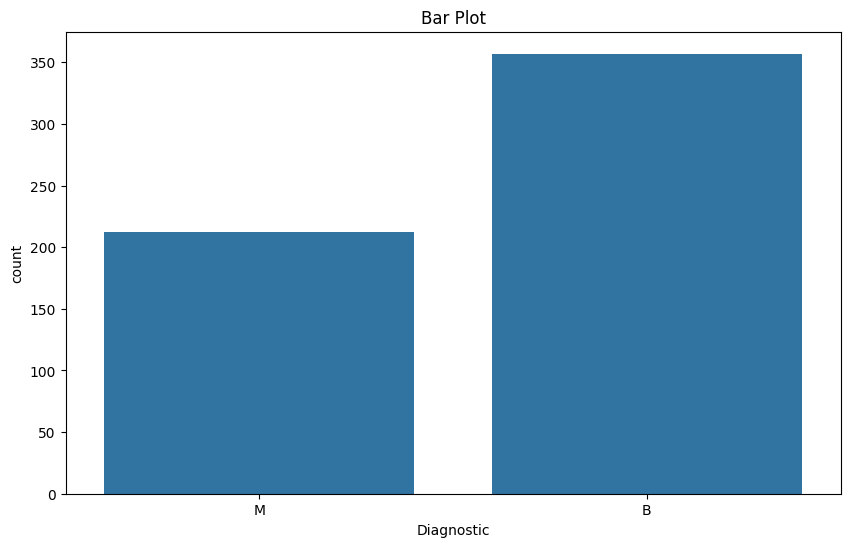

In [ ]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnostic', data=df)  
plt.title('Bar Plot')
plt.show()


Carte de corrélation (heatmap) :



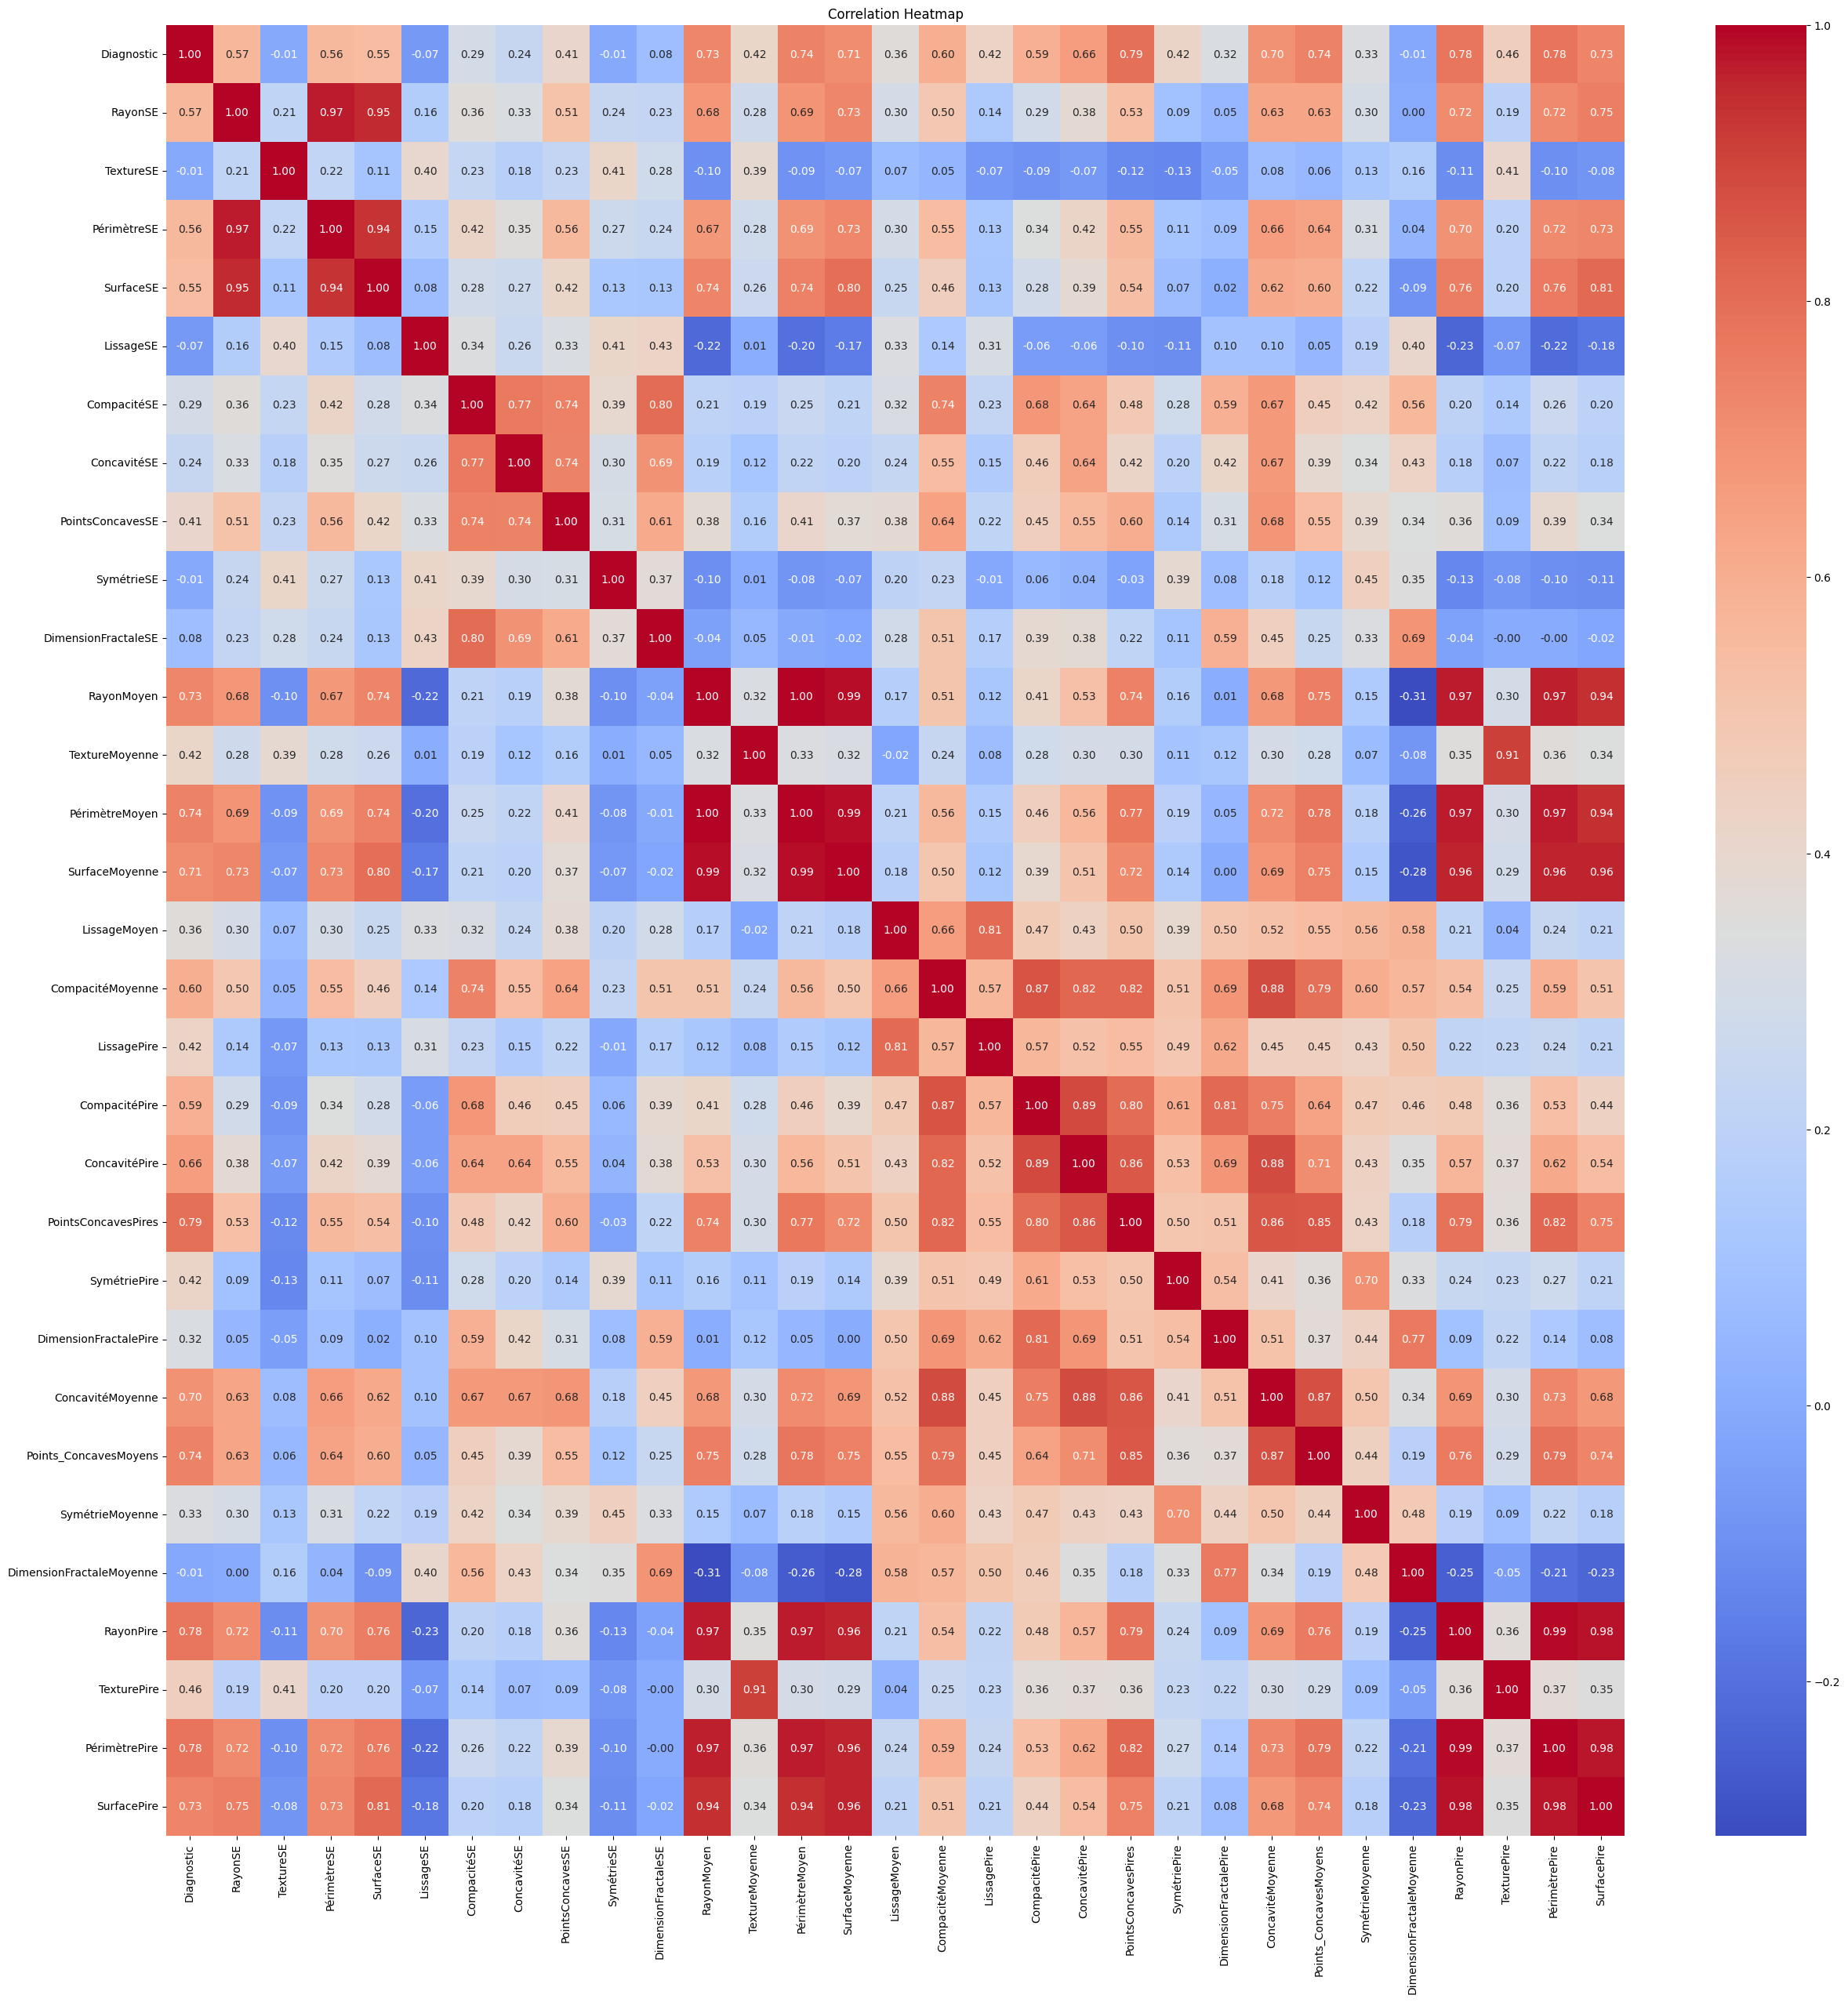

In [16]:
# Correlation heatmap
plt.figure(figsize=(30, 30))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Séparation des caractéristiques (X) de la cible (y) :



In [16]:
x=df.loc[:,df.columns!="Diagnostic"]
x

,RayonSE,TextureSE,PérimètreSE,SurfaceSE,LissageSE,CompacitéSE,ConcavitéSE,PointsConcavesSE,SymétrieSE,DimensionFractaleSE,...,SymétriePire,DimensionFractalePire,ConcavitéMoyenne,Points_ConcavesMoyens,SymétrieMoyenne,DimensionFractaleMoyenne,RayonPire,TexturePire,PérimètrePire,SurfacePire
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.053730,0.01587,0.03003,0.006193,...,0.4601,0.11890,0.30010,0.14710,0.2419,0.07871,25.380,17.33,184.60,2019.0
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.018600,0.01340,0.01389,0.003532,...,0.2750,0.08902,0.08690,0.07017,0.1812,0.05667,24.990,23.41,158.80,1956.0
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.038320,0.02058,0.02250,0.004571,...,0.3613,0.08758,0.19740,0.12790,0.2069,0.05999,23.570,25.53,152.50,1709.0
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.056610,0.01867,0.05963,0.009208,...,0.6638,0.17300,0.24140,0.10520,0.2597,0.09744,14.910,26.50,98.87,567.7
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.056880,0.01885,0.01756,0.005115,...,0.2364,0.07678,0.19800,0.10430,0.1809,0.05883,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.051980,0.02454,0.01114,0.004239,...,0.2060,0.07115,0.24390,0.13890,0.1726,0.05623,25.450,26.40,166.10,2027.0
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.039500,0.01678,0.01898,0.002498,...,0.2572,0.06637,0.14400,0.09791,0.1752,0.05533,23.690,38.25,155.00,1731.0
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.031934,0.01557,0.01318,0.003892,...,0.2218,0.07820,0.09251,0.05302,0.1590,0.05648,18.980,34.12,126.70,1124.0
567,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.071170,0.01664,0.02324,0.006185,...,0.4087,0.12400,0.35140,0.15200,0.2397,0.07016,25.740,39.42,184.60,1821.0


Division des données en ensembles d'entraînement et de test :



In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size = 0.2, random_state = 122)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


3-Les Modeles

1_Régression linéaire :

In [18]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg = linear_model.LinearRegression() 
reg.fit(X_train, y_train)

LinearRegression()

Prédictions du modèle de régression :



In [19]:
y_pred = reg.predict(X_test)

Sauvegarde du model:

In [20]:
with open("model_regression_linéaire.pkl", "wb") as file:
    pickle.dump(reg, file)

Calcul du R-carré (R²) :



In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)


0.7082460899662142


2-Régression logistique :

In [22]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)




c:\WorkSpace\Breast cancer\Breast cancer\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Prédictions

In [23]:
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

Sauvegarde du model:

In [24]:
with open("model_regression_logistique.pkl", "wb") as file:
    pickle.dump(classifier, file)

Précision

In [25]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test,test_predictions))

0.9385964912280702


3-Arbre de décision :

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Prediction

In [27]:
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

Sauvegarde du model:

In [28]:
with open("model_arbre_decision.pkl", "wb") as file:
    pickle.dump(classifier, file)

Précision :

In [29]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test,test_predictions))

0.956140350877193


4-Support Vector Machine (SVM) avec normalisation :



In [30]:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC(kernel='linear')  # 'rbf', 'poly', etc.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

with open("model_svm.pkl", "wb") as file:
    pickle.dump(model, file)

print("Rapport de classification :")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        79
           1       0.95      1.00      0.97        35

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

0.9824561403508771


5-K-Nearest Neighbors (KNN) :

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

with open("model_knn.pkl", "wb") as file:
    pickle.dump(knn, file)

train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test,test_predictions))

0.9649122807017544
